# Machine Learning and Analytics

## Homework Project 2

### Regression tests

In [ ]:
from polynomial_regression import *

In [3]:
p_gen = 3

In [4]:
beta = np.array([[10, -140, 400, -250]]).T
# beta = np.array([[10, -140]]).T
# beta = np.array([[10, -140, 400]]).T
# beta = np.array([[10, -140, 400, -250, 20, -50]]).T
# beta = np.array([[10, -140, 400, -250, 20, -50, 200, -40, 100]]).T
# beta = np.array([[10, -140, 400, -250, 20, -50, 200, -40, 100, -5, 300]]).T
# beta = np.array([[10, -140, 400, -250, 20, -50, 200, -40, 100, -5, 300, -80, 75, -20, 150, -10]]).T
# beta = np.array([[10, -140, 400, -250, 20, -50, 200, -40, 100, -5, 300, -80, 75, -20, 150, -10, 50, -30, 40, -220, 160]]).T
# beta = np.array([[10, -140, 400, -250, 20, -50, 200, -40, 100, -5, 300, -80, 75, -20, 150, -10, 50, -30, 40, -220, 160, 10, -140, 400, -250, 20, -50, 200, -40, 100, -5]]).T


In [5]:
n = 100
sig = 5
u, y = generate_data_even(p_gen, beta , sig, n, 0.1)

In [6]:
X, betahat = {},{}
ps = [1, 3, 15]
for p in ps:
   X[p] = model_matrix(p, u) 
   betahat[p] = train(X[p], y)

In [7]:
u_test, y_test = generate_data_skewed(p_gen, beta , sig, n, 0.1, 0.005)
X_test = {}
training_loss = {}
test_loss = {}
for p in ps:
     X_test[p] = model_matrix(p, u_test)
     training_loss[p] = test_coefficients(n, betahat[p], X[p], y)
     test_loss[p] = test_coefficients(n, betahat[p], X_test[p], y_test)

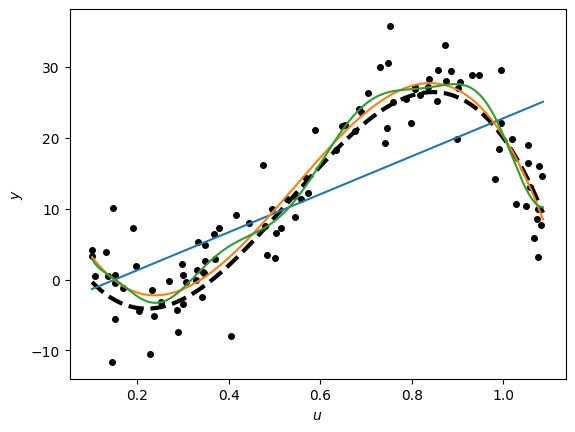

In [8]:
# #Plot the points and true line and store in the list "plots"
xx = np.arange(np.min(u), np.max(u)+5e-3, 5e-3)
yy = np.polyval(np.flip(beta), xx)
plots = [plt.plot(u, y, 'k.', markersize=8)[0], plt.plot(xx, yy, 'k--',linewidth=3)[0]]
# add the three curves
for i in ps:
    yy = np.polyval(np.flip(betahat[i]), xx)
    plots.append(plt.plot(xx, yy)[0])
plt.xlabel(r'$u$')
plt.ylabel(r'$y$')
plt.show()

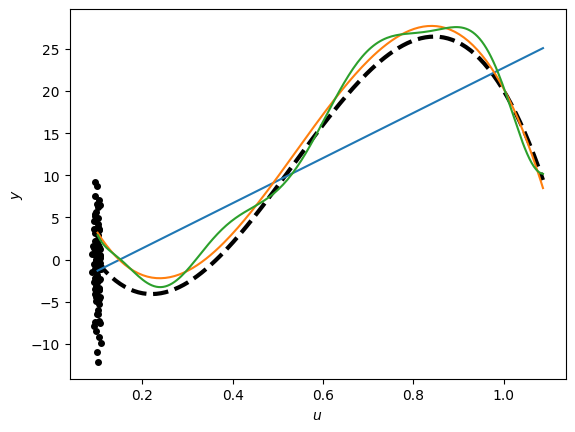

In [9]:
xx = np.arange(np.min(u), np.max(u)+5e-3, 5e-3)
yy = np.polyval(np.flip(beta), xx)
plots = [plt.plot(u_test, y_test, 'k.', markersize=8)[0], plt.plot(xx, yy, 'k--',linewidth=3)[0]]
# add the three curves
for i in ps:
    yy = np.polyval(np.flip(betahat[i]), xx)
    plots.append(plt.plot(xx, yy)[0])
plt.xlabel(r'$u$')
plt.ylabel(r'$y$')
plt.show()

In [10]:
print(f"{'Order (p)':<12} | {'Training Loss':<15} | {'Test Loss':<15}")
for p in ps:
    print(f"{p:<12} | {training_loss[p]:<15.4f} | {test_loss[p]:<15.4f}")

Order (p)    | Training Loss   | Test Loss      
1            | 67.9040         | 18.9704        
3            | 18.2454         | 33.6790        
15           | 17.0942         | 32.0823        
